Exercise 1

In [1]:
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from scipy.ndimage import correlate
import numpy as np
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import pydicom as dicom
from skimage.util import img_as_ubyte

In [2]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


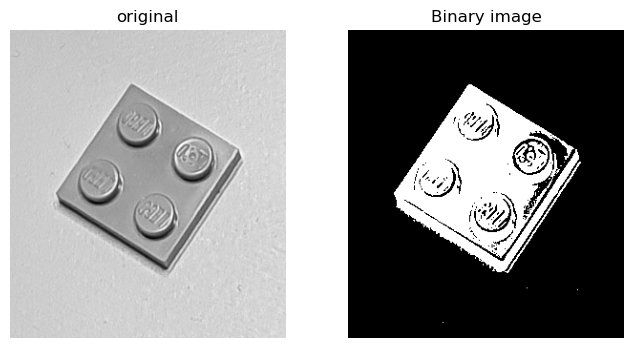

In [3]:
im_path = "data/"
im_name = "lego_5.png"

im_org = io.imread(im_path + im_name)
im_org = rgb2gray(im_org)

threshold = threshold_otsu(im_org)
bin_img = im_org < threshold

plot_comparison(im_org, bin_img, 'Binary image')

Exercise 2

In [4]:
footprint = disk(4)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0]]


C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


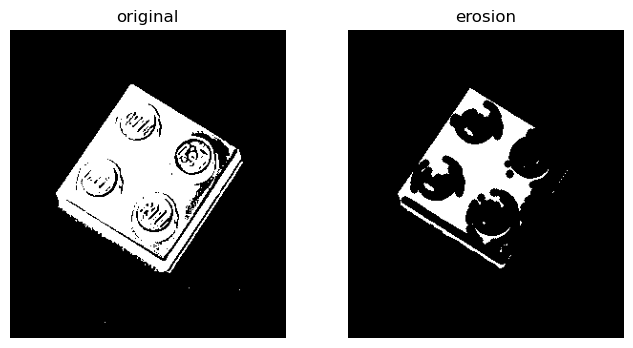

In [5]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

Exercise 3

In [6]:
dil_footprint = disk(6)
# Check the size and shape of the structuring element
print(dil_footprint)

[[0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]


C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


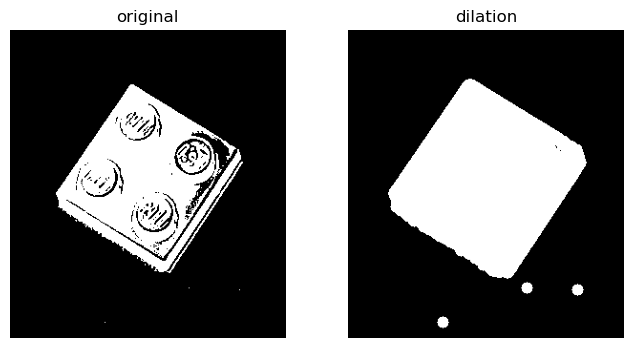

In [7]:
dilated = dilation(bin_img, dil_footprint)
plot_comparison(bin_img, dilated, 'dilation')

Exercise 4

In [8]:
op_footprint = disk(3)

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


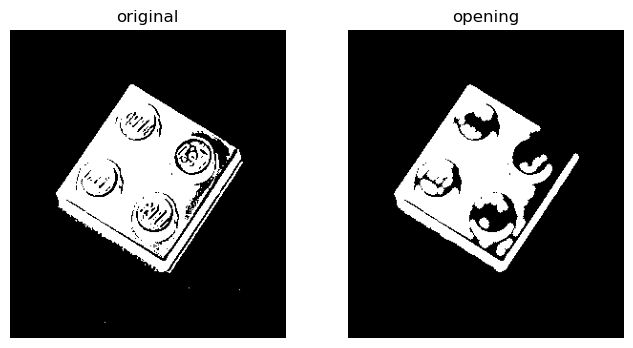

In [9]:
opened = opening(bin_img, op_footprint)
plot_comparison(bin_img, opened, 'opening')

Exercise 5

In [10]:
cl_footprint = disk(10)

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


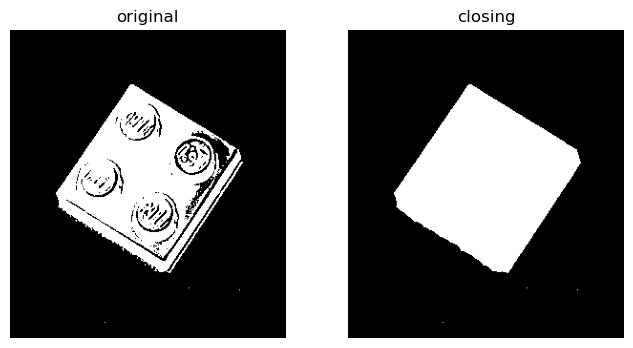

In [11]:
closed = closing(bin_img, cl_footprint)
plot_comparison(bin_img, closed, 'closing')

Exercise 6

In [12]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


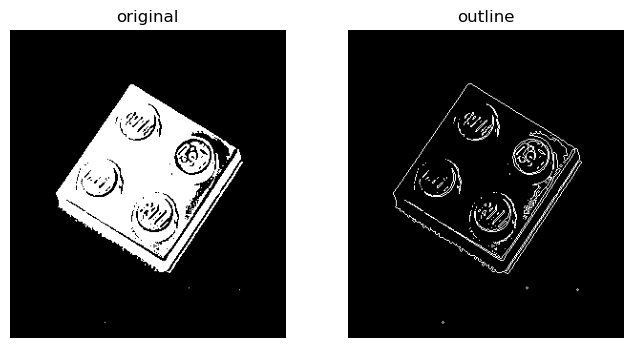

In [13]:
plot_comparison(bin_img, compute_outline(bin_img), 'outline')

Exercise 7

In [14]:
def compute_outline_with_openclose(bin_img):
    """
    Computes the outline of a binary image after opening and closing
    """
    # Step 1: opening with disk(1)
    opened = opening(bin_img, disk(1))

    # Step 2: closing with disk(15)
    closed = closing(opened, disk(15))

    # Step 3: outline = dilation - closed
    dilated = dilation(closed, disk(1))
    outline = np.logical_xor(dilated, closed)

    return outline


C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


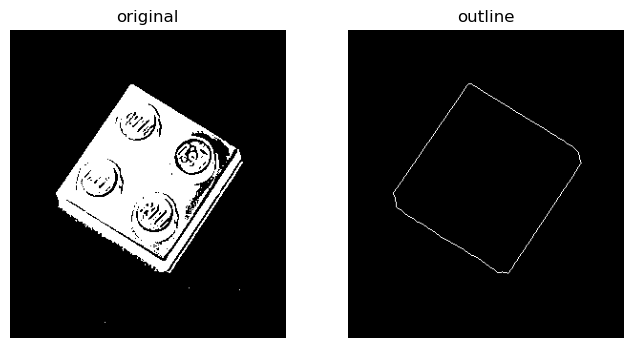

In [15]:
plot_comparison(bin_img, compute_outline_with_openclose(bin_img), 'outline')

- The opening removes tiny noise specks.
- The closing fills in the holes inside the lego brick, making it a solid region.
- The outline now traces a smooth contour around the lego brick, without the noisy inner boundaries you saw before.
That’s why the result looks like a clean perimeter of the object.

Exercise 8

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


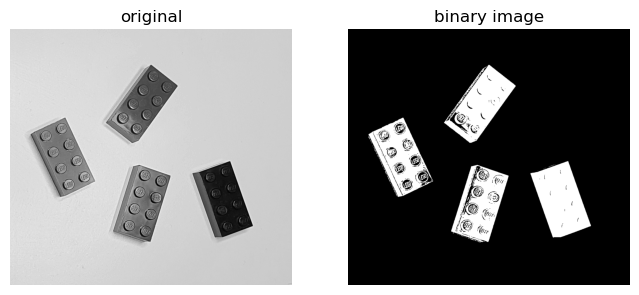

In [16]:
im_name = "lego_7.png"
im_org = io.imread(im_path + im_name)
im_org = rgb2gray(im_org)

threshold = threshold_otsu(im_org)
bin_img = im_org < threshold
plot_comparison(im_org, bin_img, 'binary image')

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


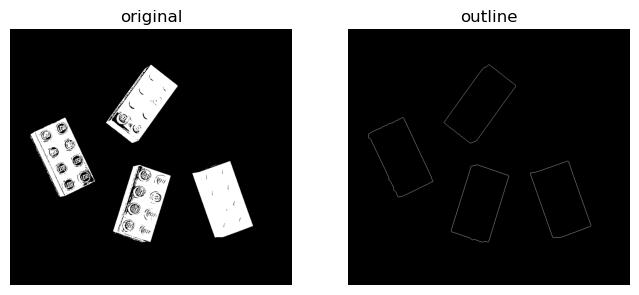

In [17]:
im_outline = compute_outline_with_openclose(bin_img)
plot_comparison(bin_img, im_outline, 'outline')

Every closing disc from 8 and up seems to work

Exercise 10

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


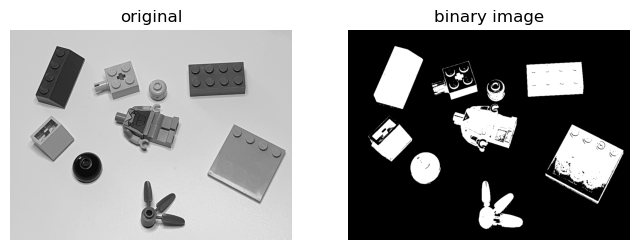

In [18]:
im_name = "lego_3.png"
im_org = io.imread(im_path + im_name)
im_org = rgb2gray(im_org)

threshold = threshold_otsu(im_org)
bin_img = im_org < threshold
plot_comparison(im_org, bin_img, 'binary image')

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


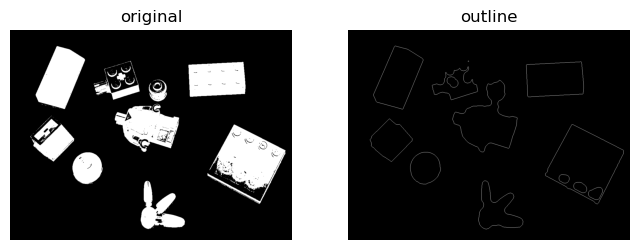

In [19]:
im_outline = compute_outline_with_openclose(bin_img)
plot_comparison(bin_img, im_outline, 'outline')

It does not work very well, since the objects have very different intesity levels, so otsu's threshold does not fit every brick

Exercise 11

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


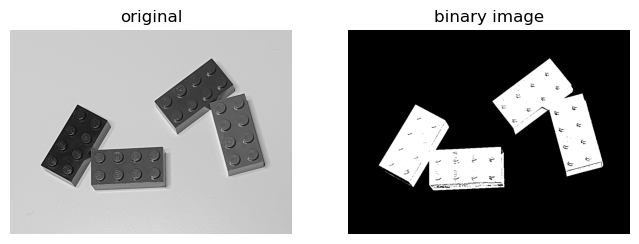

In [20]:
im_name = "lego_9.png"
im_org = io.imread(im_path + im_name)
im_org = rgb2gray(im_org)

threshold = threshold_otsu(im_org)
bin_img = im_org < threshold
plot_comparison(im_org, bin_img, 'binary image')

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


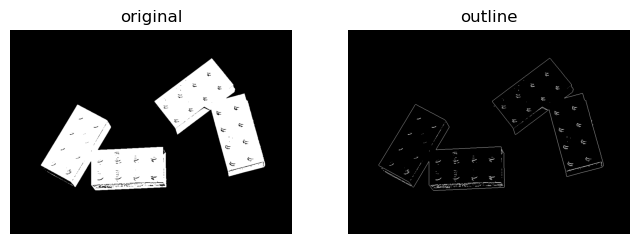

In [21]:
im_outline = compute_outline(bin_img)
plot_comparison(bin_img, im_outline, 'outline')

Exercise 12

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


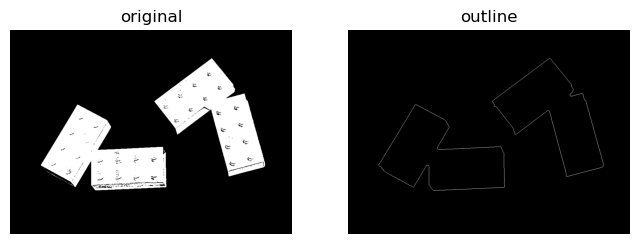

In [22]:
def compute_outline_with_close(bin_img):
    """
    Computes the outline of a binary image after opening and closing
    """

    # Step 2: closing with disk(5)
    closed = closing(bin_img, disk(5))

    # Step 3: outline = dilation - closed
    dilated = dilation(closed, disk(1))
    outline = np.logical_xor(dilated, closed)

    return outline

im_outline = compute_outline_with_close(bin_img)
plot_comparison(bin_img, im_outline, 'outline')

5 seems to be enough to close the holes

Exercise 13

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


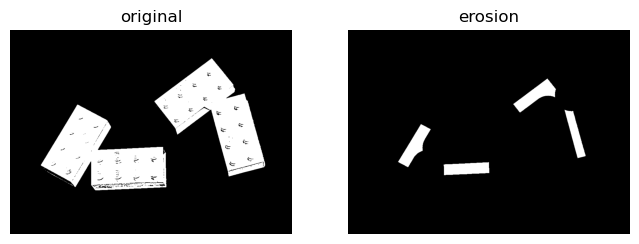

In [23]:
closed = closing(bin_img, disk(5))
eroded = erosion(closed, disk(50))
#erosion with footprint 45 and above split them but they look more rectangular with 50
plot_comparison(bin_img, eroded, 'erosion')

Exercise 14

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


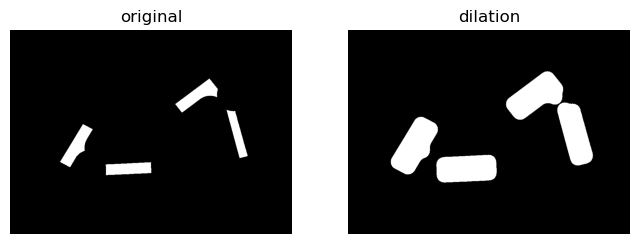

In [24]:
dilated = dilation(eroded, disk(25))

plot_comparison(eroded, dilated, 'dilation')

25 seems to be the max dilation before they touch

Exercise 15

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


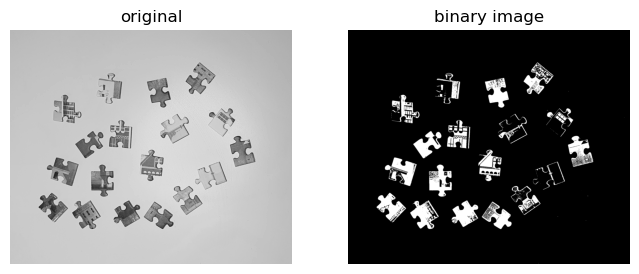

In [25]:
im_name = "puzzle_pieces.png"
im_org = io.imread(im_path + im_name)
im_org = rgb2gray(im_org)

threshold = threshold_otsu(im_org)
bin_img = im_org < threshold
plot_comparison(im_org, bin_img, 'binary image')

I observe a binary image where, due to the puzzle pieces having colors that are close to the background, otsu's threshold confuses puzzlepieces with background quite a lot

Exercise 16

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


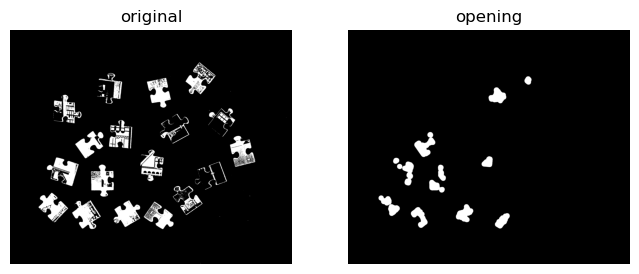

In [26]:
opened = opening(bin_img, disk(20))
plot_comparison(bin_img, opened, 'opening')

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


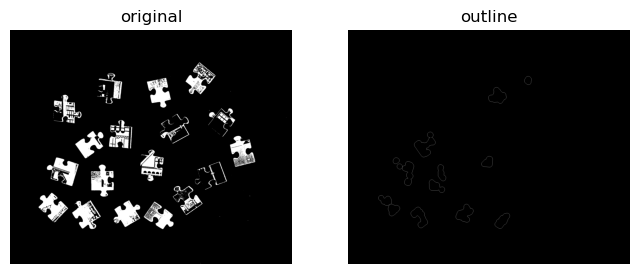

In [27]:
im_outline = compute_outline(opened)
plot_comparison(bin_img, im_outline, 'outline')

it sucks since the picture is very bad for sperating puzzlepieces from background. I have a feeling the exercise meant apply closing since the solution suggests that, so here is with closing:

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


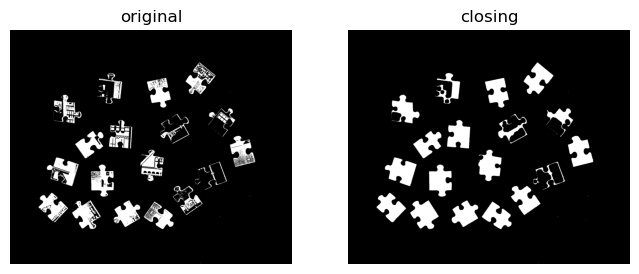

In [28]:
closed = closing(bin_img, disk(15))
plot_comparison(bin_img, closed, 'closing')

C:\Users\frede\AppData\Local\Temp\ipykernel_31396\3460403030.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


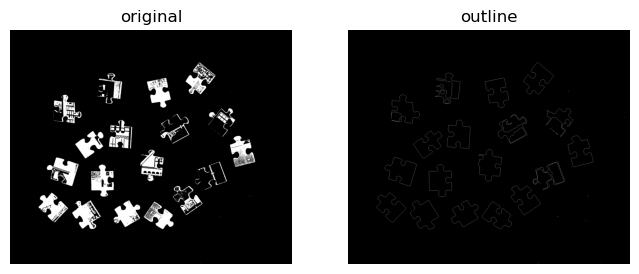

In [29]:
im_outline = compute_outline(closed)
plot_comparison(bin_img, im_outline, 'outline')

still sucks for some puzzle pieces but works for most